In [2]:
import cv2
import numpy as np

img = cv2.imread('input.jpg', cv2.IMREAD_COLOR)
# 1. Cân bằng histogram trên kênh Y
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
result = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
cv2.imwrite('enhanced.jpg', result)


True

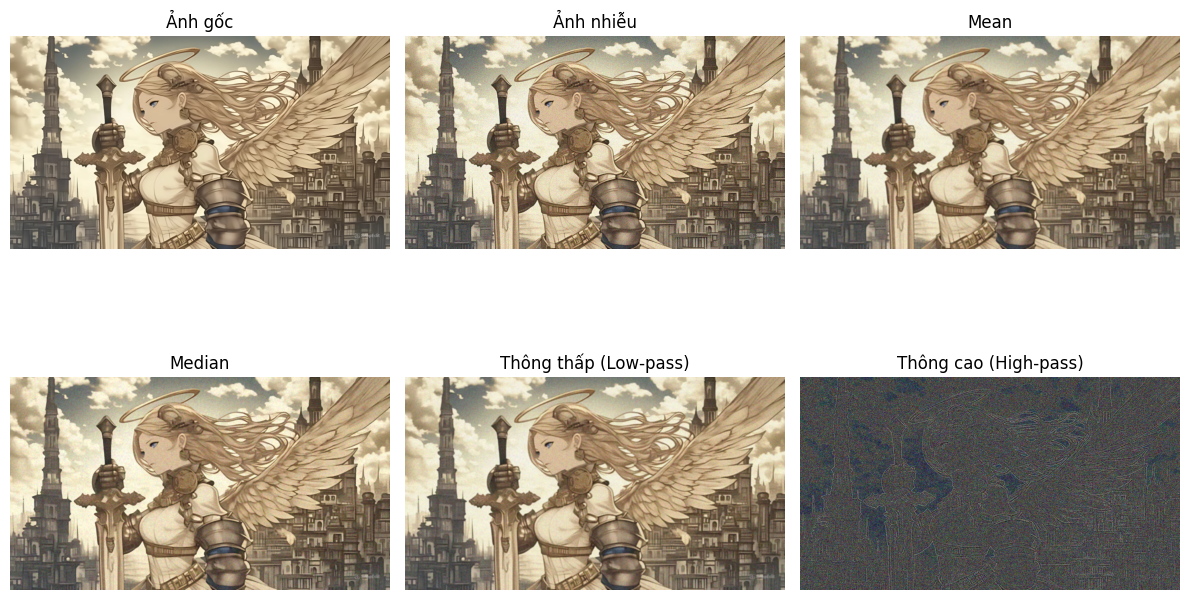

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Đọc ảnh gốc
img = cv2.imread('input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2️⃣ Thêm nhiễu Gaussian giả lập
noise = np.random.normal(0, 25, img.shape).astype(np.float32)
noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

# 3️⃣ Các kỹ thuật lọc

# (a) Lọc trung bình (Mean filter)
mean = cv2.blur(noisy, (5, 5))

# (b) Lọc trung vị (Median filter)
median = cv2.medianBlur(noisy, 5)

# (c) Lọc thông thấp (Low-pass filter) — làm mờ nhẹ, giảm chi tiết và nhiễu
kernel_low = np.ones((5, 5), np.float32) / 25
low_pass = cv2.filter2D(noisy, -1, kernel_low)

# (d) Lọc thông cao (High-pass filter) — làm nổi bật biên, chi tiết ảnh
kernel_high = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)
high_pass = cv2.filter2D(noisy, -1, kernel_high)

# 4️⃣ Hiển thị kết quả so sánh
titles = ['Ảnh gốc', 'Ảnh nhiễu', 'Mean', 'Median', 'Thông thấp (Low-pass)', 'Thông cao (High-pass)']
images = [img, noisy, mean, median, low_pass, high_pass]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
